In [4]:
import sys
sys.path.append("../")
import numpy as np 
from pypde import *
from navier import rbc2d
from stabdict import StabDict,fname_from_Ra

folder = "linear/"
# Store Results in Dictionary
Ra_dict = StabDict(fname=folder+"linear.txt")

# Default Navier Stokes Settings
ns_settings = {
    "adiabatic": False,
    "shape" : (196,196),
    #"shape" : (64,64),
    "dt" : 0.1,
    "tsave" : 5.0,
    "Pr" : 1.0,
    "dealias" : True,
    "integrator" : "rk3",
    "beta" : 1.0,
    "aspect" : 1.0,
}

# Default Newton-LGMRES Settings
ne_settings = {
    "maxiter" : 1200,
    "tol" : 1e-8,
    "jac_options": {"inner_maxiter":30},
}

# Default Stability Settings
st_settings = {
    "shape" : (21,21),
}


# Set Ra - limits
Ra_lim = [5e3,2e5]

# Initial Save
Ra_dict.save()

File already exists. Overwrite? Y = yes
y
Overwrite ...


## Simulate to find good starting field

Initialize rk3 ...
Time: 5.000
Divergence: 1.58e-05
Time: 10.000
Divergence: 9.27e-06
Time: 15.000
Divergence: 7.68e-06
Time: 20.000
Divergence: 7.00e-06
Time: 25.000
Divergence: 6.59e-06
Time: 30.000
Divergence: 6.30e-06
Time: 35.000
Divergence: 6.06e-06
Time: 40.000
Divergence: 5.85e-06
Time: 45.000
Divergence: 5.66e-06
Time: 50.000
Divergence: 5.49e-06
Time: 55.000
Divergence: 5.33e-06
Time: 60.000
Divergence: 5.18e-06


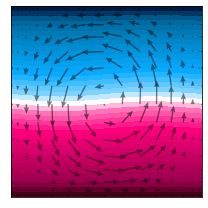

Nubot: 1.001806e+00
Nutop: 1.001806e+00
Nuvol: 1.001967e+00
0:  |F(x)| = 0.000226418; step 1
1:  |F(x)| = 0.000234861; step 1
2:  |F(x)| = 0.00022967; step 0.107574
3:  |F(x)| = 0.000224301; step 0.0303569
4:  |F(x)| = 0.000197279; step 0.00107759
5:  |F(x)| = 0.000198227; step 0.0115745
6:  |F(x)| = 0.000253897; step 1
7:  |F(x)| = 0.000259388; step 1
8:  |F(x)| = 0.000244544; step 1
9:  |F(x)| = 0.000243628; step 0.283602
10:  |F(x)| = 0.000220703; step 0.121654
11:  |F(x)| = 0.000251816; step 1
12:  |F(x)| = 0.000263341; step 1
13:  |F(x)| = 0.000226494; step 0.321626
14:  |F(x)| = 0.000249544; step 1
15:  |F(x)| = 0.000225564; step 0.139142
16:  |F(x)| = 0.00027682; step 1
17:  |F(x)| = 0.000286057; step 1
18:  |F(x)| = 0.000231236; step 0.490997
19:  |F(x)| = 0.000254057; step 1
20:  |F(x)| = 0.00031718; step 0.323437
21:  |F(x)| = 0.000337483; step 0.236296
22:  |F(x)| = 0.000320482; step 0.0312029
23:  |F(x)| = 0.000319318; step 0.0323449
24:  |F(x)| = 0.000172415; step 0.033227

In [ ]:
Ra=Ra_lim[0]
NS = rbc2d.NavierStokes(
        Ra=Ra,
        **ns_settings,
)

NS.set_temperature(amplitude=0.04)

# Simulate
NS.iterate(60)
NS.plot()
Nu, Nuv = NS.eval_Nu()

# Steady State
sol = NS.solve_steady_state(X0=None,
                            **ne_settings
                           )

# Stability analysis
evals, evecs = NS.solve_stability(**st_settings)

In [ ]:
evals, evecs = NS.solve_stability(**st_settings)

## Explore Ra

In [3]:
def residual(sol):
    return np.linalg.norm(sol.fun)

for Ra in Ra_dict.dict:
    if Ra<Ra_lim[0] or Ra>Ra_lim[1]:
        continue
    
    print("*** Ra = {:6.2e} ***".format(Ra))
    fname = fname_from_Ra(Ra)
    
    if Ra_dict.dict[Ra]:
        print("Ra {:6.2e} already known.".format(Ra))
        # Read
        NS.read(folder+fname, add_time=False)
    
    
    # Update Parameters
    NS.Ra = Ra
    NS.reset(reset_time=True)
    
    # Steady State
    sol = NS.solve_steady_state(X0=None,
                                #maxiter=4,
                                **ne_settings
                               )
    X0 = sol.x
    res = residual(sol)
    
    # Get Nu
    NS.plot()
    Nu,Nuv = NS.eval_Nu()
    
    # Stabilty analysis
    evals, evecs = NS.solve_stability(**st_settings)
    sigma = np.imag(evals[-1])
    
    # Add to dict
    Ra_dict.add(Ra, Nu, Nuv, sigma, res, fname)
    
    # Write to file
    NS.write(folder+fname, add_time=False)
    
    # Write dict
    Ra_dict.save(enforce_overwrite=True)
    

*** Ra = 5.05e+03 ***
Initialize rk3 ...
0:  |F(x)| = 1.23767e-05; step 1
1:  |F(x)| = 8.99606e-06; step 0.00619134
2:  |F(x)| = 1.04516e-05; step 1
3:  |F(x)| = 0.000820264; step 1
4:  |F(x)| = 0.00139121; step 1
5:  |F(x)| = 0.000967872; step 1
6:  |F(x)| = 0.000818478; step 1
7:  |F(x)| = 0.000450805; step 1
8:  |F(x)| = 0.0001443; step 1
9:  |F(x)| = 3.34915e-05; step 1
10:  |F(x)| = 3.14647e-05; step 0.0252846
11:  |F(x)| = 3.84489e-05; step 1
12:  |F(x)| = 5.40283e-05; step 1
13:  |F(x)| = 5.53041e-05; step 1
14:  |F(x)| = 5.15083e-05; step 0.126106
15:  |F(x)| = 3.22511e-05; step 1
16:  |F(x)| = 3.43591e-05; step 1
17:  |F(x)| = 3.24855e-05; step 1
18:  |F(x)| = 3.6612e-05; step 1
19:  |F(x)| = 3.49099e-05; step 0.361368
20:  |F(x)| = 3.12056e-05; step 0.00929216
21:  |F(x)| = 0.000296518; step 1
22:  |F(x)| = 3.32737e-05; step 1
23:  |F(x)| = 0.000142456; step 1
24:  |F(x)| = 0.000132755; step 0.050767
25:  |F(x)| = 5.4835e-05; step 1
26:  |F(x)| = 7.17017e-06; step 0.122673
27

241:  |F(x)| = 1.03275; step 1
242:  |F(x)| = 1.03236; step 1
243:  |F(x)| = 1.0353; step 1
244:  |F(x)| = 1.03689; step 1
245:  |F(x)| = 1.038; step 1
246:  |F(x)| = 1.04107; step 1
247:  |F(x)| = 1.03873; step 1


KeyboardInterrupt: 

### Some Reading and Writing stuff

In [12]:
Ra=Ra_lim[0]

fname = fname_from_Ra(Ra)
NS.write(leading_str=fname,add_time=False)

Write linear/Ra5.00e+03_T.h5 ...
Write linear/Ra5.00e+03_U.h5 ...
Write linear/Ra5.00e+03_V.h5 ...
Write linear/Ra5.00e+03_P.h5 ...
